In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv(os.path.join('..','datasets','raw','Iris.csv'))
data.drop('Id', axis=1, inplace=True)
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,6.1,2.6,5.6,1.4,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor
114,5.8,2.8,5.1,2.4,Iris-virginica
63,6.1,2.9,4.7,1.4,Iris-versicolor


In [3]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


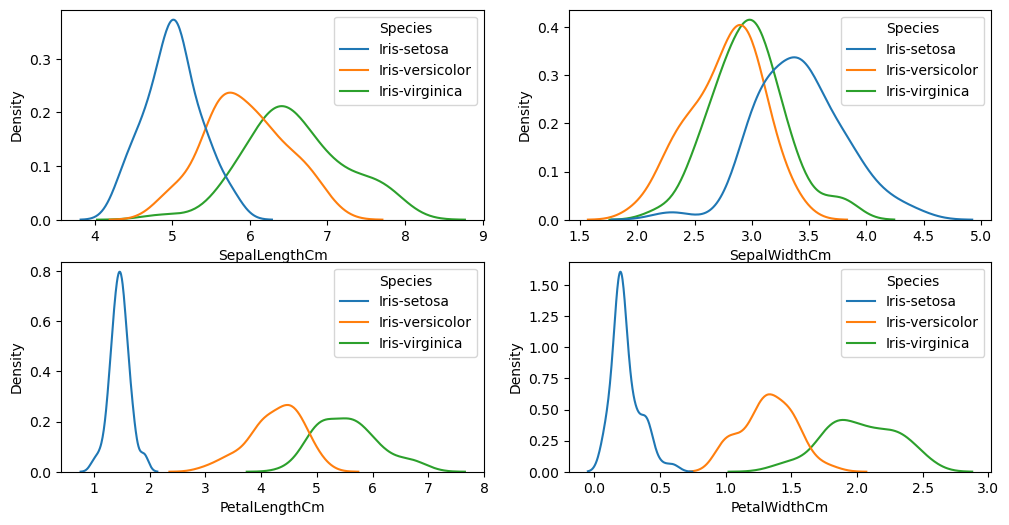

In [5]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
sns.kdeplot(x=data['SepalLengthCm'], hue=data.Species, ax=ax[0,0])
sns.kdeplot(x=data['SepalWidthCm'], hue=data.Species, ax=ax[0,1])
sns.kdeplot(x=data['PetalLengthCm'], hue=data.Species, ax=ax[1,0])
sns.kdeplot(x=data['PetalWidthCm'], hue=data.Species, ax=ax[1,1])
plt.show()

In [6]:
X = data.drop('Species', axis=1)
y = data['Species']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

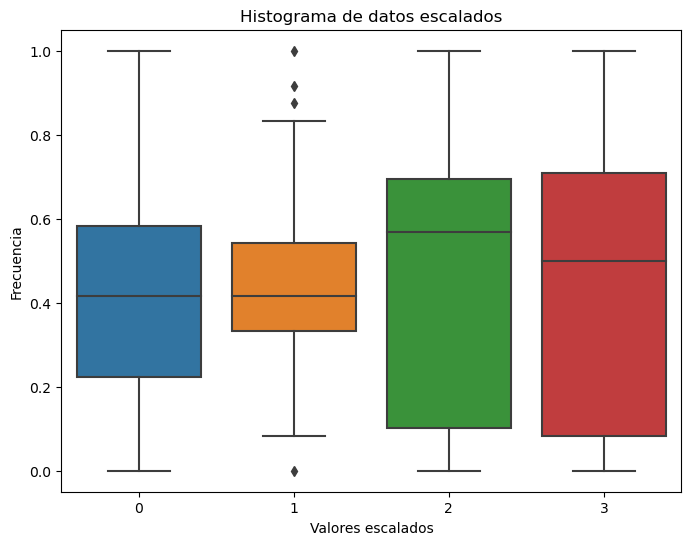

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(X_scaled)
plt.xlabel('Valores escalados')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos escalados')
plt.show()

In [8]:
# Entrenar varios modelos
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Modelo: {type(model).__name__}, Precisión: {score}")

Modelo: LogisticRegression, Precisión: 0.9666666666666667
Modelo: DecisionTreeClassifier, Precisión: 1.0
Modelo: SVC, Precisión: 1.0
